In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.quiver as quiver
from mpl_toolkits.mplot3d import Axes3D
import random

# Electrostatics 

Simulating some electrostatics physics using python:

1. Equipotenial Lines

## Electric Potential

$$
\vec{E} = \frac{1}{4\pi \epsilon_o} \frac{q}{|\vec{r}|^2} \hat{r}
$$

$$\Delta V = - \int_a^b \vec{E} \cdot d\vec{r}$$

$$
V_{\text{point}} = \frac{1}{4 \pi \epsilon_0} \frac{q}{r}
$$

$$
dV = - \vec{E} \cdot d\vec{r}
$$
$$
V = \sum dV
$$


In [2]:
k = 9e9
q = 1e-9
rf = 0.05
rq = np.array([0, 0, 0])
ro = np.array([20, 0, 0])
dr = np.array([-0.01, 0, 0])

V = 0

while np.linalg.norm(ro) > rf:
    r = ro - rq
    E = k*q*r/np.linalg.norm(r)**3
    dV = -np.dot(E, dr)
    V = V + dV
    ro = ro + dr

print("V = ", V, "volts")
Vc = k*q/rf
print("Vc = ", Vc, "volts")

V =  162.74077264561862 volts
Vc =  180.0 volts


Answer is wrong because as we get closer and closer our assumption the E field is constant is true is no long true.

In [3]:
k = 9e9
q = 1e-9
rf = 0.5
rq = np.array([0, 0, 0])
ro = np.array([30, 0, 0])
dr = np.array([-0.001, 0, 0])

V = 0

while np.linalg.norm(ro) > rf:
    r = ro - rq
    E = k*q*r/np.linalg.norm(r)**3
    dV = -np.dot(E, dr)
    V = V + dV
    ro = ro + dr

print("V = ", V, "volts")
Vc = k*q/rf
print("Vc = ", Vc, "volts")

V =  17.68201700042671 volts
Vc =  18.0 volts


- Better when `rf` is 0.5, also when increasing step size (decrease `dr`)
- Can also start further away (change `ro`)

V =  17.68201700042671 volts
Vc =  18.0 volts


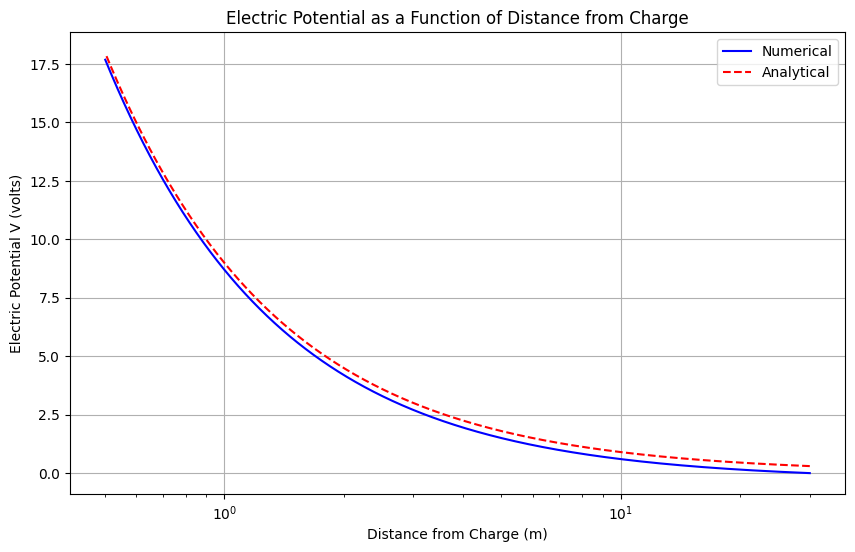

In [4]:
# Constants
k = 9e9                  # Coulomb's constant
q = 1e-9                 # Charge (C)
rf = 0.5                 # Final radius (m)
rq = np.array([0, 0, 0]) # Point charge location
ro = np.array([30, 0, 0]) # Starting observation point
dr = np.array([-0.001, 0, 0]) # Step vector

# Initialize variables
V = 0
V_values = []  
V_c_values = []         # To store potential values
distance_values = []    # To store distances

# Loop to calculate potential
while np.linalg.norm(ro) > rf:
    r = ro - rq
    E = k * q * r / np.linalg.norm(r)**3
    dV = -np.dot(E, dr)
    V += dV
    V_values.append(V)
    distance_values.append(np.linalg.norm(ro))
    V_c = k * q / np.linalg.norm(ro)
    V_c_values.append(V_c)
    ro = ro + dr

# Print results
print("V = ", V, "volts")
Vc = k * q / rf
print("Vc = ", Vc, "volts")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(distance_values, V_values, label='Numerical', color='blue')
plt.plot(distance_values, V_c_values, color='r', linestyle='--', label='Analytical')
plt.title('Electric Potential as a Function of Distance from Charge')
plt.xlabel('Distance from Charge (m)')
plt.ylabel('Electric Potential V (volts)')
plt.legend()
plt.grid()
plt.xscale('log')
plt.show()

## Change in Electric Potential - Non Straight Paths

$$
\Delta V = \frac{1}{r \pi \epsilon_0} \left( \frac{q}{r_2} - \frac{q}{r_1} \right)
$$


In [19]:
import numpy as np

k = 9e9
# Initial conditions for the electric potential calculation
 
R = 0.01
rstep = 0.0005
ro = np.array([0.01, 0, 0])
r1 = np.linalg.norm(ro)
# Angle parameters for integration
theta = 0
dtheta = np.pi / 180  # Convert degrees to radians
q1 = np.array([0,0,0])
q = 6e-6
deltaV = 0
 
#r = np.array([R * np.cos(theta), R * np.sin(theta), 0])  # Position vector in spherical coordinates
# Potential calculation using spherical coordinates
while theta < np.pi / 2:
    r = ro - q1
    dr = np.array([-rstep * np.sin(theta), rstep * np.cos(theta), 0])  # Displacement vector
    E = k * q * r/ np.linalg.norm(r)**3  # Electric field calculation
    dV = -np.dot(E, dr)  # Change in potential
    deltaV += dV  # Update total potential
    ro = ro + dr  # Update position
    theta += dtheta  # Increment angle

theta = 0
dtheta = 1 * np.pi / 180

print("deltaV = ", deltaV, "volts")
print("r2 = ", np.linalg.norm(ro), "m")
r2 = np.linalg.norm(ro)
dVc = k * (q / r2 - q / r1)
print("dVc = ", dVc, "volts")

deltaV =  -3748949.028062557 volts
r2 =  0.03425640949750304 m
dVc =  -3823652.6596888076 volts


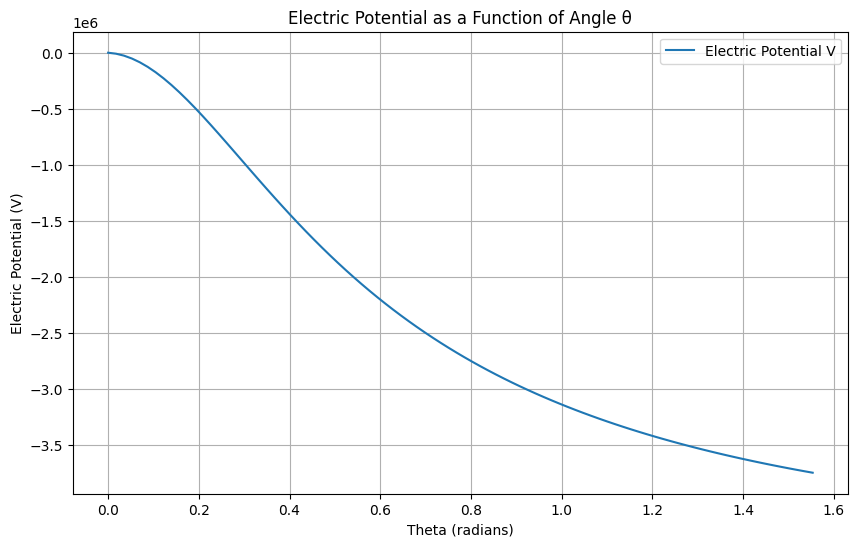

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
k = 9e9  # Coulomb's constant (N m²/C²)
q = 6e-6  # Charge magnitude (Coulombs)

# Initial conditions for the electric potential calculation
R = 0.01
rstep = 0.0005
ro = np.array([0.01, 0, 0])  # Initial position vector
deltaV = 0
V = []  # List to store potential values
theta_values = []  # List to store angles for plotting

# Angle parameters for integration
theta = 0
dtheta = np.pi / 180  # Convert degrees to radians
q1 = np.array([0, 0, 0])  # Position of the charge

# Potential calculation using spherical coordinates
while theta < np.pi / 2:
    r = ro - q1  # Vector from the charge to the point of interest
    E = k * q * r / np.linalg.norm(r)**3  # Electric field calculation
    dV = -np.dot(E, np.array([-rstep * np.sin(theta), rstep * np.cos(theta), 0]))  # Change in potential
    deltaV += dV  # Update total potential
    V.append(deltaV)  # Record the current potential
    theta_values.append(theta)  # Store the current theta
    ro += np.array([-rstep * np.sin(theta), rstep * np.cos(theta), 0])  # Update position
    theta += dtheta  # Increment angle

# Now, create the visualization
plt.figure(figsize=(10, 6))
plt.plot(theta_values, V, label="Electric Potential V")
plt.xlabel("Theta (radians)")
plt.ylabel("Electric Potential (V)")
plt.title("Electric Potential as a Function of Angle θ")
plt.grid(True)
plt.legend()
plt.show()